In [2]:
from scripts.ambiente import Ambiente
from scripts.leitor import Leitor
from scripts.problems import Nrainhas, AlgebricFunction, FabricaDeRadios, Labirinto
from joblib import Parallel,delayed
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd

%load_ext autoreload
%autoreload 2

    NRAINHAS

<Axes: >

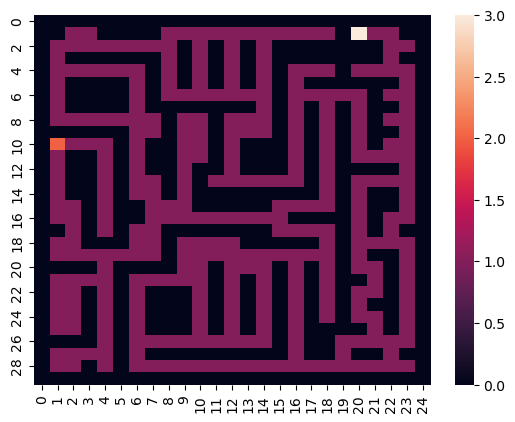

In [6]:
config = Leitor().loadJson('data\labirinto.json')
mapa = np.array(config['MAP'])
problem = Labirinto()
ambiente = Ambiente(config,problem,False)
sns.heatmap(mapa)

In [3]:
ambiente.population[0]

array([0.82215808, 0.77270403, 0.19824597, 0.32025047, 0.33641096,
       0.02321026, 0.37704442, 0.08639564, 0.29736984, 0.80884893,
       0.19712672, 0.2455464 , 0.93062658, 0.79793671, 0.35813768,
       0.04476277, 0.61731101, 0.38401981, 0.67122237, 0.04258738,
       0.28090691, 0.3585496 , 0.83668331, 0.57233692, 0.59567216,
       0.24711759, 0.42628348, 0.1274615 , 0.26349329, 0.16819817,
       0.72777198, 0.9255363 , 0.62638448, 0.71275126, 0.62598362,
       0.23882611, 0.81552839, 0.71321886, 0.19667486, 0.94722026,
       0.29561437, 0.75256215, 0.59660419, 0.13064184, 0.95495467,
       0.01732939, 0.59311258, 0.0272443 , 0.7358868 , 0.56308067,
       0.99082917, 0.2018173 , 0.0756729 , 0.62365287, 0.74239392,
       0.9203115 , 0.05406464, 0.73848732, 0.13235458, 0.2681835 ,
       0.97737652, 0.09432481, 0.6347916 , 0.28026001, 0.22792958,
       0.07834188, 0.41003653, 0.26830028, 0.25168356, 0.619293  ,
       0.15085722, 0.18067196, 0.20049316, 0.05179921, 0.98458

<Axes: >

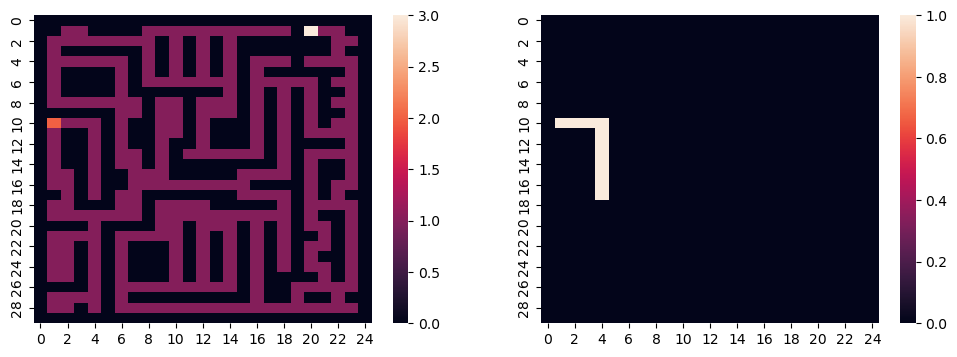

In [22]:
x = problem.decode(ambiente.population[0])
fig, axes = plt.subplots(1,2,figsize=(12,4))
sns.heatmap(mapa,ax=axes[0])
sns.heatmap(np.array([[1 if (i,j) in x else 0 for j in range(mapa.shape[1])] for i in range(mapa.shape[0])]), ax=axes[1])

In [19]:
problem.objective_function(x)

0.5794287746721186

In [24]:
ambiente.run()

100%|██████████| 1000/1000 [01:12<00:00, 13.86it/s]


<Axes: >

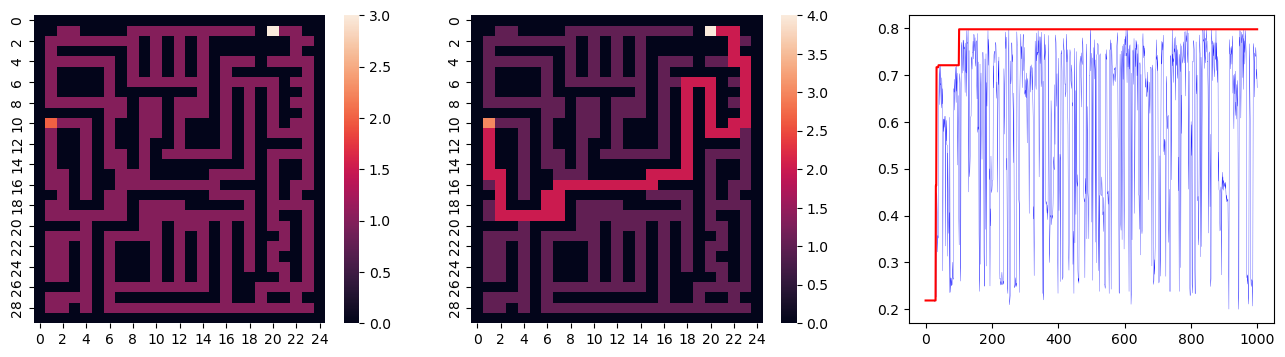

In [26]:
best = problem.decode(ambiente.elite_population[0])#.count((i,j))
# best_map = np.array([[1 if (i,j) in best else 0 for j in range(mapa.shape[1])] for i in range(mapa.shape[0])])
# total_map = best_map + mapa
total_map = problem.get_matrix(best)
fig, axes = plt.subplots(1,3,figsize=(16,4))
sns.heatmap(mapa,ax=axes[0])
sns.heatmap(total_map, ax=axes[1])
sns.lineplot(ambiente.results_mean,color='Blue',linewidth=0.2,ax=axes[2])
sns.lineplot(ambiente.results_best,color='Red',ax=axes[2])

In [27]:
config = Leitor().loadJson('data\labirinto.json')
ambientes = [
    Ambiente(
        config=config,
        problem=Labirinto(),
        parallel=False,
    ) for _ in range(9)
]
def run(ambiente:Ambiente):
    ambiente.run()
    return ambiente

ambientes = Parallel(n_jobs=-1)(
    delayed(run)(ambiente) for ambiente in ambientes
)

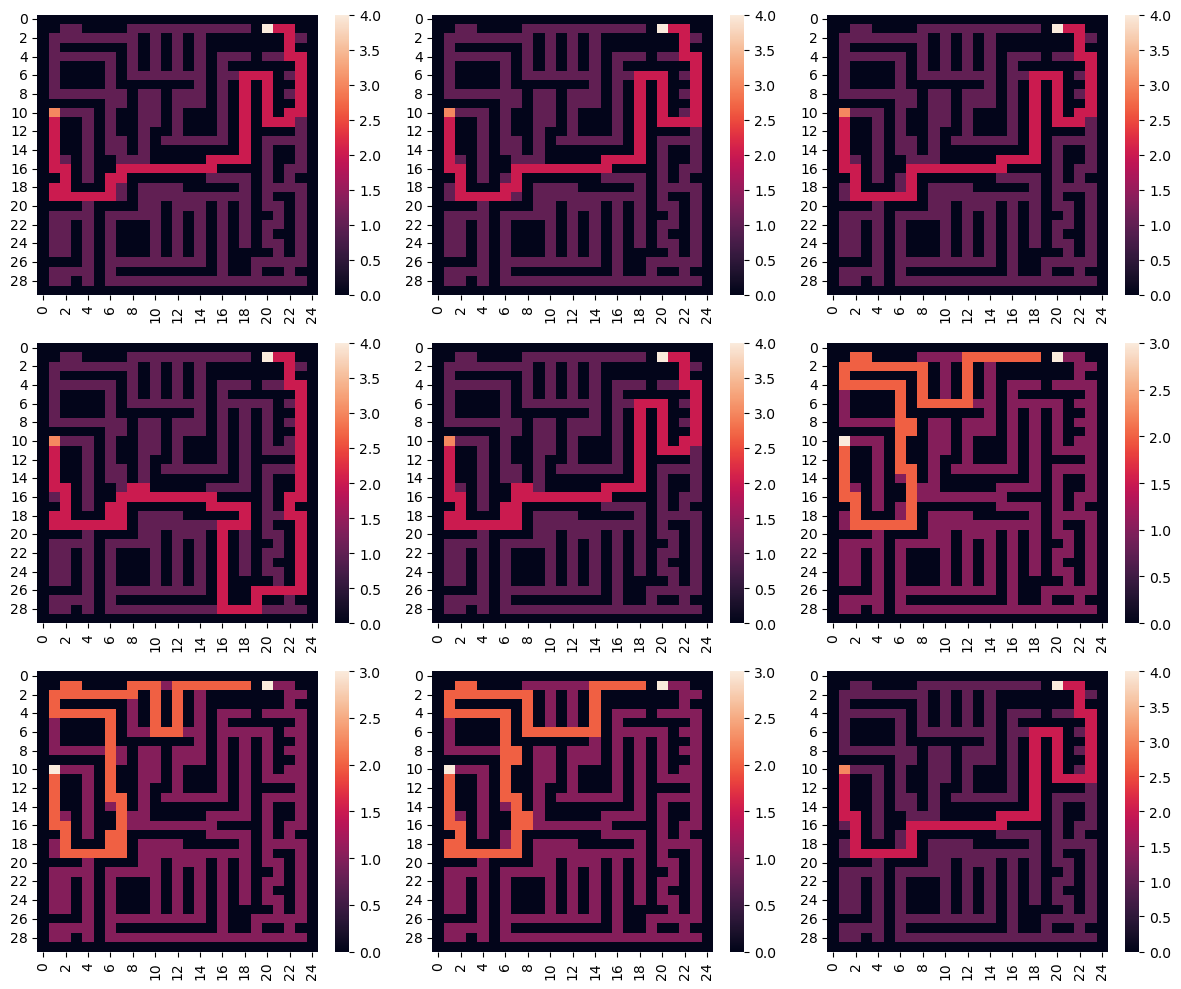

In [28]:
fig, axes = plt.subplots(3,3,figsize=(12,10))
for i in range(3):
    for j in range(3):
        aux_ambiente = ambientes[i +3*j]
        best = problem.decode(aux_ambiente.elite_population[0])
        matrix = problem.get_matrix(best)
        sns.heatmap(matrix,ax=axes[i][j])
        #frase = 'Execução #'+str(j+1)

plt.tight_layout()

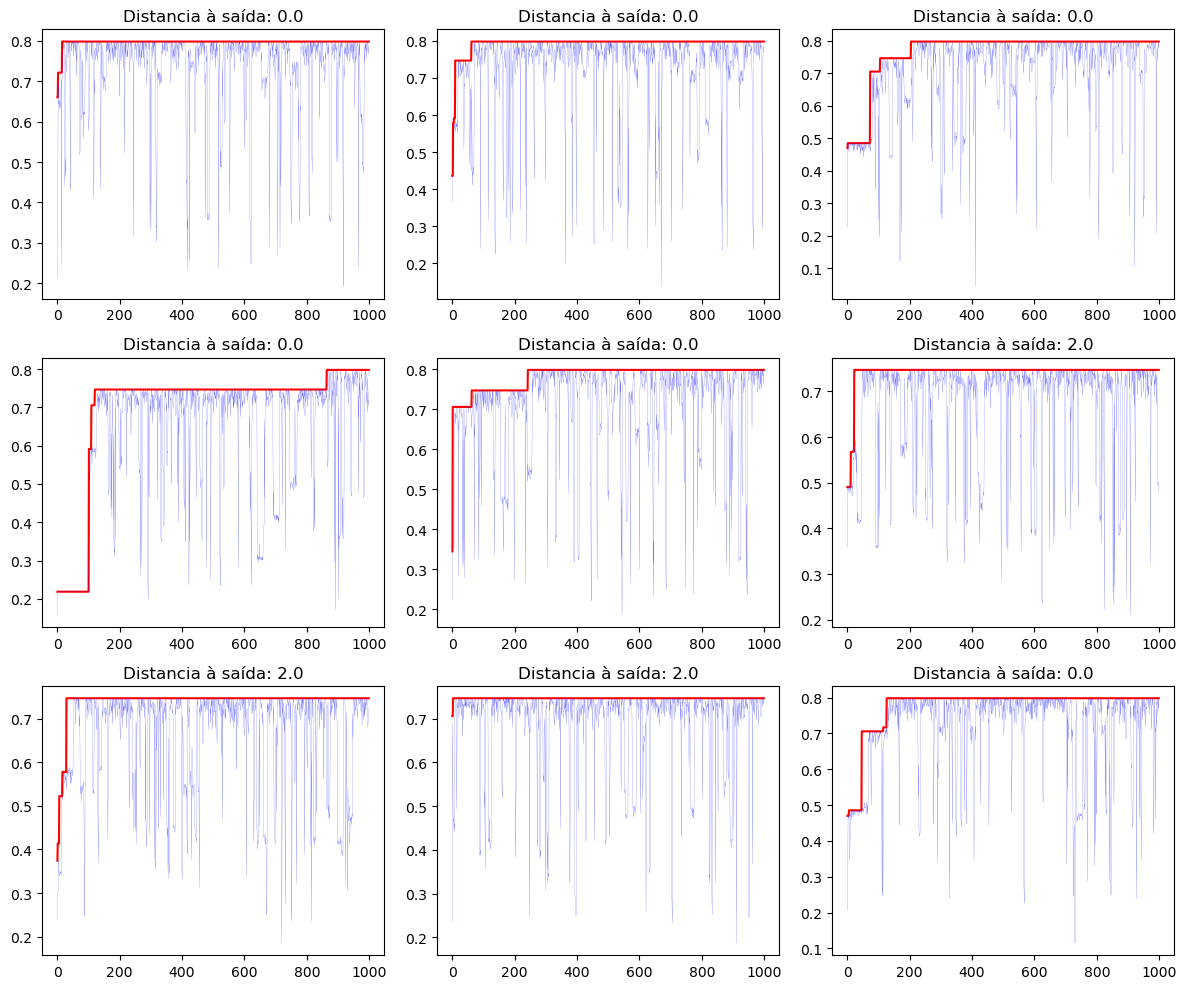

In [32]:
fig, axes = plt.subplots(3,3,figsize=(12,10))
for i in range(3):
    for j in range(3):
        k = i +3*j
        aux_ambiente = ambientes[i +3*j]
        distancia = problem.objective_function(problem.decode(ambientes[k].elite_population[0]))
        title = 'Distancia à saída: ' + '{:.2}'.format(distancia)
        sns.lineplot(ambientes[k].results_best,color='Red',ax=axes[i][j]).set(title=title)
        sns.lineplot(ambientes[k].results_mean,color='Blue',ax=axes[i][j],linewidth=0.1)
        #frase = 'Execução #'+str(j+1)

plt.tight_layout()